# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

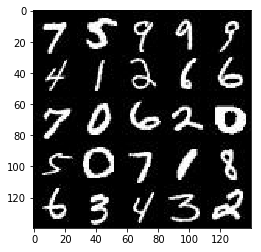

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

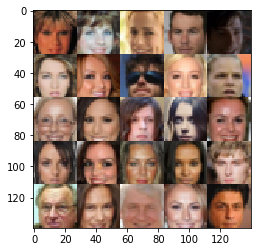

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/home/charles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    z_input= tf.placeholder(tf.float32, (None, z_dim), name='z_input')
    learning_rate =tf.placeholder(tf.float32, name='learning_rate')
    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
    
        layer1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', activation=None)
        layer1 = tf.maximum(layer1*alpha, layer1)
        
        layer2 = tf.layers.conv2d(layer1, 128, 5, strides=2, padding='same', activation=None)
        layer2 = tf.layers.batch_normalization(layer2, training=True)
        layer2 = tf.maximum(layer2*alpha, layer2)
        
        layer3 = tf.layers.conv2d(layer2, 256, 5, strides=2, padding='same', activation=None)
        layer3 = tf.layers.batch_normalization(layer3, training=True)
        layer3 = tf.maximum(layer3*alpha, layer3)
        
        flatten = tf.reshape(layer3,(-1, 4*4*256)) 
        logits = tf.layers.dense(flatten, 1)
        output = tf.sigmoid(logits)
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha= 0.1
    with tf.variable_scope('generator', reuse=not is_train):
        fully_connected = tf.layers.dense(z, 7*7*512)
        fully_connected = tf.reshape(fully_connected, (-1, 7, 7, 512))
        fully_connected = tf.layers.batch_normalization(fully_connected, training=is_train)
        fully_connected = tf.maximum(fully_connected*alpha, fully_connected)
        
        deconv1 = tf.layers.conv2d_transpose(fully_connected, 256, 5, strides=2, padding='same', activation=None)
        deconv1 = tf.layers.batch_normalization(deconv1, training=is_train)
        deconv1 = tf.maximum(deconv1*alpha, deconv1)
        
        deconv2 = tf.layers.conv2d_transpose(deconv1, 128, 5, strides=2, padding='same', activation=None)
        deconv2 = tf.layers.batch_normalization(deconv2, training=is_train)
        deconv2 = tf.maximum(deconv2*alpha, deconv2)
        
        logits = tf.layers.conv2d_transpose(deconv2, out_channel_dim, 5, strides=1, padding='same', activation=None)
        output = tf.tanh(logits)
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    gen_model = generator(input_z, out_channel_dim)#, is_train=True)
    dis_output_real, dis_logits_real = discriminator(input_real)
    dis_output_fake, dis_logits_fake = discriminator(gen_model, reuse=True)
    
    smoothing = 0.1
    dis_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=dis_logits_real,
        labels=tf.ones_like(dis_output_real*(1-smoothing))))
    
    dis_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=dis_logits_fake,
        labels=tf.zeros_like(dis_output_fake)))
    
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        logits=dis_logits_fake,
        labels=tf.ones_like(dis_output_fake)))
    
    dis_loss = dis_loss_real + dis_loss_fake 
    return dis_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [11]:
def model_opt(dis_loss, gen_loss, learning_rate, beta1):#changed d_loss to dis_loss
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    trainable = tf.trainable_variables()
    dis_vars = [var for var in trainable if var.name.startswith('discriminator')]
    gen_vars = [var for var in trainable if var.name.startswith('generator')]
    
    dis_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(dis_loss, var_list=dis_vars)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        gen_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(gen_loss, var_list=gen_vars)
    
    return dis_train_opt, gen_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [13]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lrate = model_inputs(image_width, image_height, image_channels, z_dim)
    dis_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    dis_opt, gen_opt = model_opt(dis_loss, gen_loss, lrate, beta1)
    
    saver = tf.train.Saver()
    losses = []
    step = 0

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                step += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                
                _ = sess.run(dis_opt, feed_dict={input_real: batch_images,
                                                input_z: batch_z,
                                                lrate: learning_rate})
                                                
                _ = sess.run(gen_opt, feed_dict={input_real: batch_images,
                                                input_z: batch_z,
                                                lrate: learning_rate})
                if step == 1:
                    print('Initial Output:')
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                                    
                if step % 10 == 0:
                    dis_train_loss = dis_loss.eval({input_z: batch_z, input_real: batch_images})
                    gen_train_loss = gen_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(dis_train_loss),
                          "Generator Loss: {:.4f}".format(gen_train_loss))
                
                    losses.append((dis_train_loss, gen_train_loss))

 #               if step % 50 == 0:
  #                  dis_train_loss = dis_loss.eval({input_z: batch_z, input_real: batch_images})
   #                 gen_train_loss = gen_loss.eval({input_z: batch_z})
#
 #                   print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
  #                        "Discriminator Loss: {:.4f}...".format(dis_train_loss),
   #                       "Generator Loss: {:.4f}".format(gen_train_loss))

                if step % 100 == 0:
                    show_generator_output(sess, 16, input_z, image_channels, data_image_mode)
                    
        saver.save(sess, './generator.ckpt')    
    return losses
                    
            

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Initial Output:


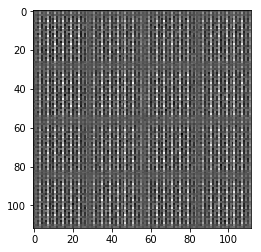

Epoch 1/2... Discriminator Loss: 0.0383... Generator Loss: 5.4450
Epoch 1/2... Discriminator Loss: 0.0076... Generator Loss: 14.4774
Epoch 1/2... Discriminator Loss: 0.6459... Generator Loss: 1.5913
Epoch 1/2... Discriminator Loss: 0.8355... Generator Loss: 4.0759
Epoch 1/2... Discriminator Loss: 1.1517... Generator Loss: 2.0717
Epoch 1/2... Discriminator Loss: 1.5507... Generator Loss: 1.0285
Epoch 1/2... Discriminator Loss: 2.0696... Generator Loss: 0.2117
Epoch 1/2... Discriminator Loss: 2.1159... Generator Loss: 0.2125
Epoch 1/2... Discriminator Loss: 1.6722... Generator Loss: 0.3943
Epoch 1/2... Discriminator Loss: 1.6634... Generator Loss: 0.3369


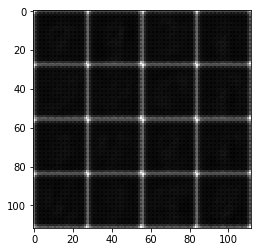

Epoch 1/2... Discriminator Loss: 2.0243... Generator Loss: 0.1845
Epoch 1/2... Discriminator Loss: 1.5419... Generator Loss: 0.3499
Epoch 1/2... Discriminator Loss: 1.4553... Generator Loss: 0.4142
Epoch 1/2... Discriminator Loss: 1.4649... Generator Loss: 0.5586
Epoch 1/2... Discriminator Loss: 1.3659... Generator Loss: 0.6074
Epoch 1/2... Discriminator Loss: 1.8170... Generator Loss: 0.2269
Epoch 1/2... Discriminator Loss: 1.3125... Generator Loss: 0.5562
Epoch 1/2... Discriminator Loss: 1.4197... Generator Loss: 0.4236
Epoch 1/2... Discriminator Loss: 1.2065... Generator Loss: 0.5933
Epoch 1/2... Discriminator Loss: 1.4974... Generator Loss: 0.3245


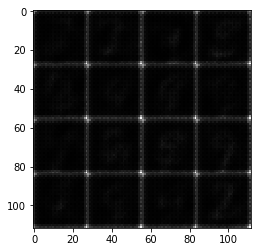

Epoch 1/2... Discriminator Loss: 1.2846... Generator Loss: 0.5170
Epoch 1/2... Discriminator Loss: 1.2006... Generator Loss: 0.5716
Epoch 1/2... Discriminator Loss: 1.3846... Generator Loss: 1.6945
Epoch 1/2... Discriminator Loss: 1.1516... Generator Loss: 0.8128
Epoch 1/2... Discriminator Loss: 1.7582... Generator Loss: 0.2517
Epoch 1/2... Discriminator Loss: 1.6866... Generator Loss: 0.2754
Epoch 1/2... Discriminator Loss: 1.5189... Generator Loss: 0.3272
Epoch 1/2... Discriminator Loss: 1.5819... Generator Loss: 0.3109
Epoch 1/2... Discriminator Loss: 1.4306... Generator Loss: 0.3811
Epoch 1/2... Discriminator Loss: 1.2847... Generator Loss: 0.5061


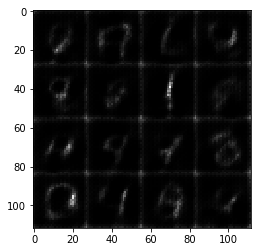

Epoch 1/2... Discriminator Loss: 1.4668... Generator Loss: 0.3884
Epoch 1/2... Discriminator Loss: 1.1997... Generator Loss: 0.5843
Epoch 1/2... Discriminator Loss: 1.3806... Generator Loss: 0.4332
Epoch 1/2... Discriminator Loss: 1.1869... Generator Loss: 0.6421
Epoch 1/2... Discriminator Loss: 1.8230... Generator Loss: 0.2281
Epoch 1/2... Discriminator Loss: 1.2349... Generator Loss: 0.8618
Epoch 1/2... Discriminator Loss: 2.0057... Generator Loss: 0.1806
Epoch 1/2... Discriminator Loss: 1.1494... Generator Loss: 0.5775
Epoch 1/2... Discriminator Loss: 1.2077... Generator Loss: 0.5410
Epoch 1/2... Discriminator Loss: 1.7215... Generator Loss: 0.3041


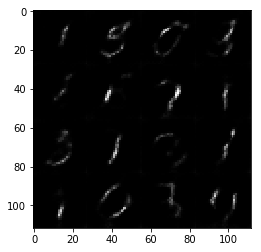

Epoch 1/2... Discriminator Loss: 1.3992... Generator Loss: 1.3491
Epoch 1/2... Discriminator Loss: 0.9734... Generator Loss: 0.7702
Epoch 1/2... Discriminator Loss: 1.1880... Generator Loss: 0.5462
Epoch 1/2... Discriminator Loss: 1.4657... Generator Loss: 0.3575
Epoch 1/2... Discriminator Loss: 1.1838... Generator Loss: 0.8591
Epoch 1/2... Discriminator Loss: 1.7312... Generator Loss: 0.2618
Epoch 1/2... Discriminator Loss: 1.1237... Generator Loss: 0.5363
Epoch 1/2... Discriminator Loss: 1.2732... Generator Loss: 1.5014
Epoch 1/2... Discriminator Loss: 1.5450... Generator Loss: 0.3609
Epoch 1/2... Discriminator Loss: 1.0675... Generator Loss: 0.6099


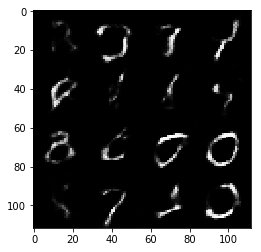

Epoch 1/2... Discriminator Loss: 0.6711... Generator Loss: 1.9847
Epoch 1/2... Discriminator Loss: 1.4541... Generator Loss: 0.3458
Epoch 1/2... Discriminator Loss: 0.9734... Generator Loss: 0.6880
Epoch 1/2... Discriminator Loss: 1.0993... Generator Loss: 0.5819
Epoch 1/2... Discriminator Loss: 0.7186... Generator Loss: 1.2278
Epoch 1/2... Discriminator Loss: 1.2842... Generator Loss: 1.4201
Epoch 1/2... Discriminator Loss: 0.7664... Generator Loss: 0.8520
Epoch 1/2... Discriminator Loss: 1.1937... Generator Loss: 0.5097
Epoch 1/2... Discriminator Loss: 0.6062... Generator Loss: 1.5308
Epoch 1/2... Discriminator Loss: 0.9129... Generator Loss: 0.6884


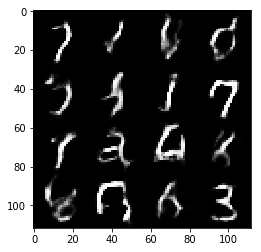

Epoch 1/2... Discriminator Loss: 1.1047... Generator Loss: 0.5769
Epoch 1/2... Discriminator Loss: 0.9349... Generator Loss: 1.7674
Epoch 1/2... Discriminator Loss: 1.1915... Generator Loss: 0.9156
Epoch 1/2... Discriminator Loss: 1.1681... Generator Loss: 0.5819
Epoch 1/2... Discriminator Loss: 1.0967... Generator Loss: 0.7048
Epoch 1/2... Discriminator Loss: 1.2594... Generator Loss: 0.5162
Epoch 1/2... Discriminator Loss: 1.2284... Generator Loss: 0.7749
Epoch 1/2... Discriminator Loss: 0.9812... Generator Loss: 1.5590
Epoch 1/2... Discriminator Loss: 1.1144... Generator Loss: 0.7890
Epoch 1/2... Discriminator Loss: 1.0997... Generator Loss: 0.5572


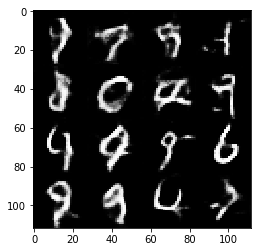

Epoch 1/2... Discriminator Loss: 1.3859... Generator Loss: 0.4224
Epoch 1/2... Discriminator Loss: 0.9298... Generator Loss: 0.9886
Epoch 1/2... Discriminator Loss: 0.9221... Generator Loss: 1.2491
Epoch 1/2... Discriminator Loss: 1.2146... Generator Loss: 1.2469
Epoch 1/2... Discriminator Loss: 1.2498... Generator Loss: 0.5482
Epoch 1/2... Discriminator Loss: 1.4510... Generator Loss: 0.3610
Epoch 1/2... Discriminator Loss: 1.2523... Generator Loss: 0.5216
Epoch 1/2... Discriminator Loss: 1.7559... Generator Loss: 1.6816
Epoch 1/2... Discriminator Loss: 1.2841... Generator Loss: 0.5489
Epoch 1/2... Discriminator Loss: 1.1959... Generator Loss: 0.9620


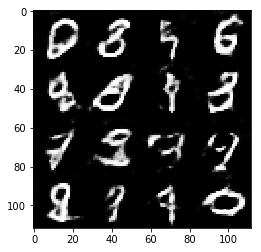

Epoch 1/2... Discriminator Loss: 1.3590... Generator Loss: 0.4373
Epoch 1/2... Discriminator Loss: 1.1165... Generator Loss: 0.6248
Epoch 1/2... Discriminator Loss: 1.2017... Generator Loss: 1.0267
Epoch 1/2... Discriminator Loss: 1.5256... Generator Loss: 0.3330
Epoch 1/2... Discriminator Loss: 1.0930... Generator Loss: 1.0165
Epoch 1/2... Discriminator Loss: 1.2065... Generator Loss: 1.0755
Epoch 1/2... Discriminator Loss: 1.3012... Generator Loss: 0.5087
Epoch 1/2... Discriminator Loss: 1.0460... Generator Loss: 0.8087
Epoch 1/2... Discriminator Loss: 2.3026... Generator Loss: 0.1459
Epoch 1/2... Discriminator Loss: 1.0522... Generator Loss: 0.7688


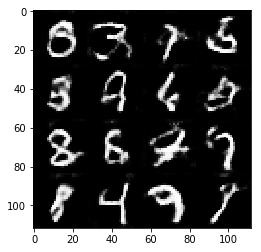

Epoch 1/2... Discriminator Loss: 1.1199... Generator Loss: 0.9378
Epoch 1/2... Discriminator Loss: 1.2311... Generator Loss: 0.5994
Epoch 1/2... Discriminator Loss: 1.6081... Generator Loss: 0.2890
Epoch 2/2... Discriminator Loss: 1.1469... Generator Loss: 0.8243
Epoch 2/2... Discriminator Loss: 1.5309... Generator Loss: 0.3284
Epoch 2/2... Discriminator Loss: 1.0893... Generator Loss: 0.8238
Epoch 2/2... Discriminator Loss: 1.5459... Generator Loss: 1.5948
Epoch 2/2... Discriminator Loss: 1.1024... Generator Loss: 0.8214
Epoch 2/2... Discriminator Loss: 1.4513... Generator Loss: 0.3890
Epoch 2/2... Discriminator Loss: 1.5305... Generator Loss: 0.3492


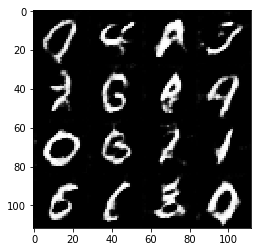

Epoch 2/2... Discriminator Loss: 1.1609... Generator Loss: 0.6305
Epoch 2/2... Discriminator Loss: 1.3742... Generator Loss: 0.4124
Epoch 2/2... Discriminator Loss: 1.0857... Generator Loss: 0.6930
Epoch 2/2... Discriminator Loss: 1.1651... Generator Loss: 0.6751
Epoch 2/2... Discriminator Loss: 1.6418... Generator Loss: 2.0803
Epoch 2/2... Discriminator Loss: 1.2865... Generator Loss: 0.5759
Epoch 2/2... Discriminator Loss: 0.9641... Generator Loss: 0.9821
Epoch 2/2... Discriminator Loss: 1.0389... Generator Loss: 0.9735
Epoch 2/2... Discriminator Loss: 1.2306... Generator Loss: 1.0211
Epoch 2/2... Discriminator Loss: 1.1446... Generator Loss: 0.8342


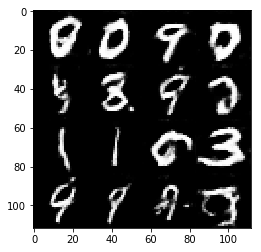

Epoch 2/2... Discriminator Loss: 1.0181... Generator Loss: 0.9890
Epoch 2/2... Discriminator Loss: 1.3150... Generator Loss: 1.5370
Epoch 2/2... Discriminator Loss: 1.2314... Generator Loss: 0.7952
Epoch 2/2... Discriminator Loss: 1.3628... Generator Loss: 1.4826
Epoch 2/2... Discriminator Loss: 1.3453... Generator Loss: 0.5331
Epoch 2/2... Discriminator Loss: 0.9682... Generator Loss: 0.9548
Epoch 2/2... Discriminator Loss: 1.0878... Generator Loss: 1.2182
Epoch 2/2... Discriminator Loss: 0.9730... Generator Loss: 1.0605
Epoch 2/2... Discriminator Loss: 1.1944... Generator Loss: 0.8250
Epoch 2/2... Discriminator Loss: 1.0983... Generator Loss: 0.7274


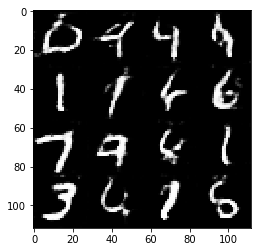

Epoch 2/2... Discriminator Loss: 1.3304... Generator Loss: 0.4088
Epoch 2/2... Discriminator Loss: 1.1796... Generator Loss: 0.7020
Epoch 2/2... Discriminator Loss: 1.0738... Generator Loss: 0.7176
Epoch 2/2... Discriminator Loss: 1.7481... Generator Loss: 0.2816
Epoch 2/2... Discriminator Loss: 1.4556... Generator Loss: 0.3475
Epoch 2/2... Discriminator Loss: 1.3167... Generator Loss: 0.8800
Epoch 2/2... Discriminator Loss: 1.0138... Generator Loss: 0.7598
Epoch 2/2... Discriminator Loss: 1.0738... Generator Loss: 0.8730
Epoch 2/2... Discriminator Loss: 1.4582... Generator Loss: 0.3752
Epoch 2/2... Discriminator Loss: 1.1882... Generator Loss: 0.5940


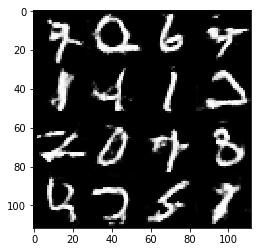

Epoch 2/2... Discriminator Loss: 1.0799... Generator Loss: 0.7705
Epoch 2/2... Discriminator Loss: 1.2775... Generator Loss: 0.4789
Epoch 2/2... Discriminator Loss: 1.7791... Generator Loss: 0.2537
Epoch 2/2... Discriminator Loss: 1.0824... Generator Loss: 0.7977
Epoch 2/2... Discriminator Loss: 1.3737... Generator Loss: 0.3860
Epoch 2/2... Discriminator Loss: 1.1712... Generator Loss: 0.5353
Epoch 2/2... Discriminator Loss: 0.9972... Generator Loss: 0.7197
Epoch 2/2... Discriminator Loss: 1.2882... Generator Loss: 0.4743
Epoch 2/2... Discriminator Loss: 1.4884... Generator Loss: 0.3662
Epoch 2/2... Discriminator Loss: 1.1242... Generator Loss: 0.7623


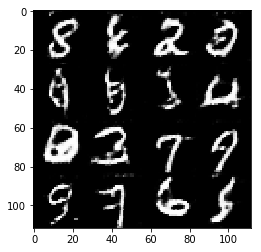

Epoch 2/2... Discriminator Loss: 1.2934... Generator Loss: 0.4826
Epoch 2/2... Discriminator Loss: 1.1925... Generator Loss: 0.5202
Epoch 2/2... Discriminator Loss: 1.3857... Generator Loss: 0.4088
Epoch 2/2... Discriminator Loss: 1.2964... Generator Loss: 0.4658
Epoch 2/2... Discriminator Loss: 0.9963... Generator Loss: 1.0379
Epoch 2/2... Discriminator Loss: 0.9430... Generator Loss: 0.8445
Epoch 2/2... Discriminator Loss: 1.5761... Generator Loss: 0.3077
Epoch 2/2... Discriminator Loss: 0.9705... Generator Loss: 0.8543
Epoch 2/2... Discriminator Loss: 0.8422... Generator Loss: 1.0578
Epoch 2/2... Discriminator Loss: 2.2681... Generator Loss: 0.1631


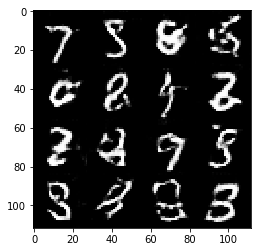

Epoch 2/2... Discriminator Loss: 1.0754... Generator Loss: 0.7398
Epoch 2/2... Discriminator Loss: 1.0702... Generator Loss: 1.0521
Epoch 2/2... Discriminator Loss: 0.7598... Generator Loss: 1.2424
Epoch 2/2... Discriminator Loss: 1.2996... Generator Loss: 1.3757
Epoch 2/2... Discriminator Loss: 1.0625... Generator Loss: 0.6188
Epoch 2/2... Discriminator Loss: 1.0909... Generator Loss: 0.6918
Epoch 2/2... Discriminator Loss: 1.4283... Generator Loss: 0.3874
Epoch 2/2... Discriminator Loss: 1.1617... Generator Loss: 0.5241
Epoch 2/2... Discriminator Loss: 1.1889... Generator Loss: 0.5032
Epoch 2/2... Discriminator Loss: 1.1242... Generator Loss: 0.6269


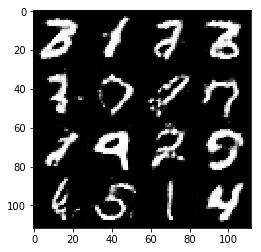

Epoch 2/2... Discriminator Loss: 1.8552... Generator Loss: 0.2215
Epoch 2/2... Discriminator Loss: 1.2337... Generator Loss: 1.2206
Epoch 2/2... Discriminator Loss: 0.9534... Generator Loss: 0.8310
Epoch 2/2... Discriminator Loss: 1.1160... Generator Loss: 0.6964
Epoch 2/2... Discriminator Loss: 1.2316... Generator Loss: 1.8888
Epoch 2/2... Discriminator Loss: 0.9342... Generator Loss: 0.7468
Epoch 2/2... Discriminator Loss: 1.0467... Generator Loss: 0.6158
Epoch 2/2... Discriminator Loss: 0.9150... Generator Loss: 0.7738
Epoch 2/2... Discriminator Loss: 1.2414... Generator Loss: 1.7031
Epoch 2/2... Discriminator Loss: 0.9985... Generator Loss: 0.8108


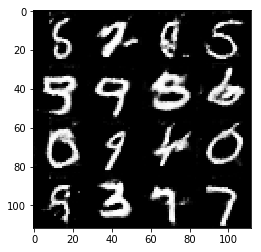

Epoch 2/2... Discriminator Loss: 0.9730... Generator Loss: 0.7873
Epoch 2/2... Discriminator Loss: 1.1788... Generator Loss: 0.5330
Epoch 2/2... Discriminator Loss: 0.8706... Generator Loss: 1.3462
Epoch 2/2... Discriminator Loss: 1.2248... Generator Loss: 1.3211
Epoch 2/2... Discriminator Loss: 0.6985... Generator Loss: 1.0647
Epoch 2/2... Discriminator Loss: 1.6139... Generator Loss: 0.2912
Epoch 2/2... Discriminator Loss: 1.1636... Generator Loss: 0.5088
Epoch 2/2... Discriminator Loss: 1.5287... Generator Loss: 0.3372
Epoch 2/2... Discriminator Loss: 0.8006... Generator Loss: 1.1542
Epoch 2/2... Discriminator Loss: 0.8949... Generator Loss: 1.2305


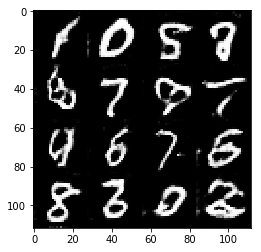

Epoch 2/2... Discriminator Loss: 0.9887... Generator Loss: 2.0132
Epoch 2/2... Discriminator Loss: 1.3066... Generator Loss: 1.5936
Epoch 2/2... Discriminator Loss: 1.0268... Generator Loss: 1.0078
Epoch 2/2... Discriminator Loss: 1.3011... Generator Loss: 0.4816
Epoch 2/2... Discriminator Loss: 0.9953... Generator Loss: 0.7942
Epoch 2/2... Discriminator Loss: 1.2067... Generator Loss: 1.7523
Epoch 2/2... Discriminator Loss: 0.9013... Generator Loss: 0.9025


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.25


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the 


whole epoch or stop when it starts to generate realistic faces.

Initial Output:


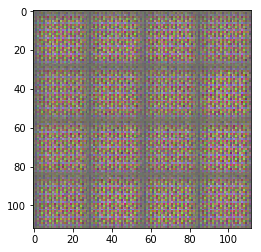

Epoch 1/1... Discriminator Loss: 0.0271... Generator Loss: 7.1928
Epoch 1/1... Discriminator Loss: 0.8407... Generator Loss: 0.6473
Epoch 1/1... Discriminator Loss: 0.0520... Generator Loss: 18.6642
Epoch 1/1... Discriminator Loss: 1.6708... Generator Loss: 0.3993
Epoch 1/1... Discriminator Loss: 1.4894... Generator Loss: 0.7903
Epoch 1/1... Discriminator Loss: 2.5121... Generator Loss: 0.1318
Epoch 1/1... Discriminator Loss: 1.3495... Generator Loss: 0.3979
Epoch 1/1... Discriminator Loss: 1.3567... Generator Loss: 0.4488
Epoch 1/1... Discriminator Loss: 0.7033... Generator Loss: 0.8779
Epoch 1/1... Discriminator Loss: 0.1594... Generator Loss: 4.3628


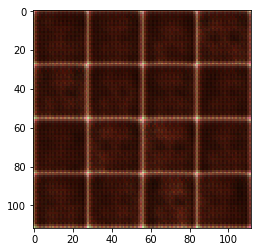

Epoch 1/1... Discriminator Loss: 0.4458... Generator Loss: 1.5157
Epoch 1/1... Discriminator Loss: 0.2420... Generator Loss: 3.9142
Epoch 1/1... Discriminator Loss: 0.8981... Generator Loss: 1.3716
Epoch 1/1... Discriminator Loss: 1.5675... Generator Loss: 0.3605
Epoch 1/1... Discriminator Loss: 1.3512... Generator Loss: 2.4764
Epoch 1/1... Discriminator Loss: 0.8323... Generator Loss: 1.8211
Epoch 1/1... Discriminator Loss: 2.0073... Generator Loss: 0.1941
Epoch 1/1... Discriminator Loss: 1.6092... Generator Loss: 1.3508
Epoch 1/1... Discriminator Loss: 1.8737... Generator Loss: 0.2225
Epoch 1/1... Discriminator Loss: 1.2194... Generator Loss: 1.2055


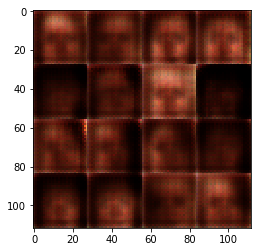

Epoch 1/1... Discriminator Loss: 1.1918... Generator Loss: 1.2687
Epoch 1/1... Discriminator Loss: 1.5274... Generator Loss: 0.3864
Epoch 1/1... Discriminator Loss: 1.0980... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.4585... Generator Loss: 0.3753
Epoch 1/1... Discriminator Loss: 1.3752... Generator Loss: 0.5470
Epoch 1/1... Discriminator Loss: 1.3228... Generator Loss: 0.4554
Epoch 1/1... Discriminator Loss: 2.0573... Generator Loss: 0.1726
Epoch 1/1... Discriminator Loss: 0.7325... Generator Loss: 2.7730
Epoch 1/1... Discriminator Loss: 1.4724... Generator Loss: 0.3606
Epoch 1/1... Discriminator Loss: 1.4019... Generator Loss: 0.3401


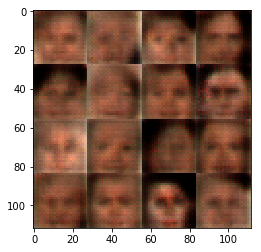

Epoch 1/1... Discriminator Loss: 1.2657... Generator Loss: 2.0523
Epoch 1/1... Discriminator Loss: 1.7772... Generator Loss: 0.2688
Epoch 1/1... Discriminator Loss: 0.9292... Generator Loss: 1.1220
Epoch 1/1... Discriminator Loss: 1.3734... Generator Loss: 0.9655
Epoch 1/1... Discriminator Loss: 1.2031... Generator Loss: 0.5084
Epoch 1/1... Discriminator Loss: 1.4618... Generator Loss: 2.0755
Epoch 1/1... Discriminator Loss: 1.6217... Generator Loss: 0.3382
Epoch 1/1... Discriminator Loss: 0.8829... Generator Loss: 0.9843
Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 0.7341
Epoch 1/1... Discriminator Loss: 1.1793... Generator Loss: 0.7353


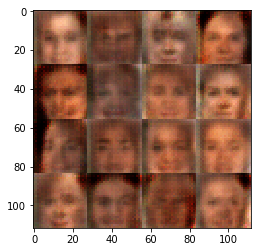

Epoch 1/1... Discriminator Loss: 0.7622... Generator Loss: 1.4166
Epoch 1/1... Discriminator Loss: 1.4083... Generator Loss: 0.4535
Epoch 1/1... Discriminator Loss: 1.1570... Generator Loss: 1.4207
Epoch 1/1... Discriminator Loss: 1.3323... Generator Loss: 0.4255
Epoch 1/1... Discriminator Loss: 0.9382... Generator Loss: 2.6636
Epoch 1/1... Discriminator Loss: 0.7430... Generator Loss: 1.9033
Epoch 1/1... Discriminator Loss: 1.7403... Generator Loss: 1.8771
Epoch 1/1... Discriminator Loss: 1.4332... Generator Loss: 0.5610
Epoch 1/1... Discriminator Loss: 1.5064... Generator Loss: 0.8736
Epoch 1/1... Discriminator Loss: 1.1130... Generator Loss: 0.7406


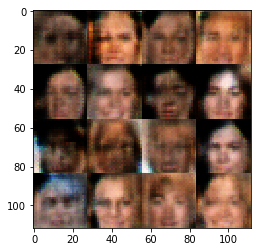

Epoch 1/1... Discriminator Loss: 1.5298... Generator Loss: 1.8007
Epoch 1/1... Discriminator Loss: 1.1271... Generator Loss: 0.6085
Epoch 1/1... Discriminator Loss: 1.6371... Generator Loss: 0.2809
Epoch 1/1... Discriminator Loss: 0.9231... Generator Loss: 1.2919
Epoch 1/1... Discriminator Loss: 1.4530... Generator Loss: 0.7369
Epoch 1/1... Discriminator Loss: 1.1063... Generator Loss: 0.7379
Epoch 1/1... Discriminator Loss: 0.9805... Generator Loss: 0.9057
Epoch 1/1... Discriminator Loss: 1.2253... Generator Loss: 0.6970
Epoch 1/1... Discriminator Loss: 1.6318... Generator Loss: 0.2944
Epoch 1/1... Discriminator Loss: 1.3472... Generator Loss: 0.5315


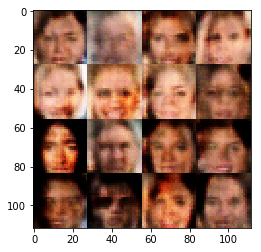

Epoch 1/1... Discriminator Loss: 0.9509... Generator Loss: 1.6689
Epoch 1/1... Discriminator Loss: 1.8696... Generator Loss: 0.2637
Epoch 1/1... Discriminator Loss: 1.5438... Generator Loss: 0.5111
Epoch 1/1... Discriminator Loss: 0.8964... Generator Loss: 1.5779
Epoch 1/1... Discriminator Loss: 1.1652... Generator Loss: 0.9139
Epoch 1/1... Discriminator Loss: 1.5868... Generator Loss: 0.5168
Epoch 1/1... Discriminator Loss: 1.0052... Generator Loss: 0.5809
Epoch 1/1... Discriminator Loss: 2.6072... Generator Loss: 1.9208
Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 0.6810
Epoch 1/1... Discriminator Loss: 0.9081... Generator Loss: 0.9134


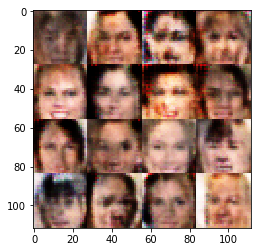

Epoch 1/1... Discriminator Loss: 1.2469... Generator Loss: 0.9081
Epoch 1/1... Discriminator Loss: 0.9906... Generator Loss: 1.4833
Epoch 1/1... Discriminator Loss: 0.9840... Generator Loss: 1.1728
Epoch 1/1... Discriminator Loss: 1.4795... Generator Loss: 1.3143
Epoch 1/1... Discriminator Loss: 1.0168... Generator Loss: 1.3903
Epoch 1/1... Discriminator Loss: 1.0057... Generator Loss: 0.8327
Epoch 1/1... Discriminator Loss: 0.7527... Generator Loss: 1.9929
Epoch 1/1... Discriminator Loss: 1.2574... Generator Loss: 0.4698
Epoch 1/1... Discriminator Loss: 1.2749... Generator Loss: 0.5973
Epoch 1/1... Discriminator Loss: 1.2425... Generator Loss: 0.7339


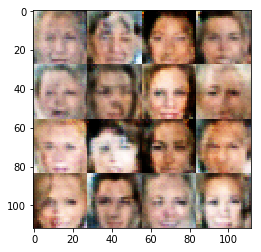

Epoch 1/1... Discriminator Loss: 0.9564... Generator Loss: 1.2695
Epoch 1/1... Discriminator Loss: 1.2513... Generator Loss: 1.1397
Epoch 1/1... Discriminator Loss: 1.8353... Generator Loss: 1.6146
Epoch 1/1... Discriminator Loss: 1.1696... Generator Loss: 0.9367
Epoch 1/1... Discriminator Loss: 0.7764... Generator Loss: 1.6894
Epoch 1/1... Discriminator Loss: 0.8215... Generator Loss: 0.9166
Epoch 1/1... Discriminator Loss: 1.3992... Generator Loss: 0.7631
Epoch 1/1... Discriminator Loss: 1.0220... Generator Loss: 1.3807
Epoch 1/1... Discriminator Loss: 1.7442... Generator Loss: 1.7163
Epoch 1/1... Discriminator Loss: 0.7428... Generator Loss: 1.4958


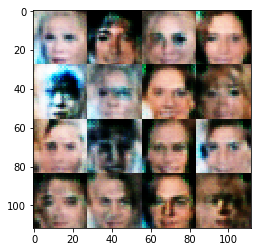

Epoch 1/1... Discriminator Loss: 0.7219... Generator Loss: 1.6562
Epoch 1/1... Discriminator Loss: 0.6621... Generator Loss: 1.1176
Epoch 1/1... Discriminator Loss: 1.3286... Generator Loss: 0.8812
Epoch 1/1... Discriminator Loss: 1.2783... Generator Loss: 0.4623
Epoch 1/1... Discriminator Loss: 0.7812... Generator Loss: 1.0323
Epoch 1/1... Discriminator Loss: 1.6522... Generator Loss: 0.2941
Epoch 1/1... Discriminator Loss: 0.8388... Generator Loss: 1.5740
Epoch 1/1... Discriminator Loss: 1.3374... Generator Loss: 1.0630
Epoch 1/1... Discriminator Loss: 0.7017... Generator Loss: 1.2592
Epoch 1/1... Discriminator Loss: 0.8301... Generator Loss: 1.2808


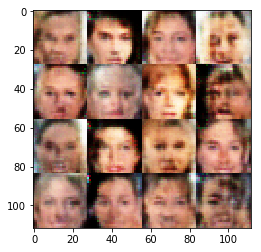

Epoch 1/1... Discriminator Loss: 0.8643... Generator Loss: 1.4810
Epoch 1/1... Discriminator Loss: 1.3618... Generator Loss: 0.6259
Epoch 1/1... Discriminator Loss: 1.4530... Generator Loss: 1.7591
Epoch 1/1... Discriminator Loss: 1.6582... Generator Loss: 1.6175
Epoch 1/1... Discriminator Loss: 1.3310... Generator Loss: 0.6152
Epoch 1/1... Discriminator Loss: 1.1642... Generator Loss: 0.6957
Epoch 1/1... Discriminator Loss: 1.8823... Generator Loss: 1.6859
Epoch 1/1... Discriminator Loss: 1.5217... Generator Loss: 0.3247
Epoch 1/1... Discriminator Loss: 1.2492... Generator Loss: 0.5459
Epoch 1/1... Discriminator Loss: 0.9315... Generator Loss: 0.8121


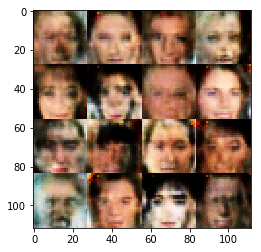

Epoch 1/1... Discriminator Loss: 1.2041... Generator Loss: 0.5993
Epoch 1/1... Discriminator Loss: 1.2341... Generator Loss: 0.6295
Epoch 1/1... Discriminator Loss: 1.0691... Generator Loss: 0.7377
Epoch 1/1... Discriminator Loss: 1.6073... Generator Loss: 1.9406
Epoch 1/1... Discriminator Loss: 1.6985... Generator Loss: 1.2789
Epoch 1/1... Discriminator Loss: 1.3196... Generator Loss: 0.5077
Epoch 1/1... Discriminator Loss: 0.5656... Generator Loss: 1.5569
Epoch 1/1... Discriminator Loss: 1.2691... Generator Loss: 0.4845
Epoch 1/1... Discriminator Loss: 1.2842... Generator Loss: 0.5209
Epoch 1/1... Discriminator Loss: 0.8559... Generator Loss: 1.1977


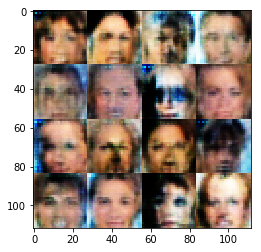

Epoch 1/1... Discriminator Loss: 1.4045... Generator Loss: 1.0290
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.5147
Epoch 1/1... Discriminator Loss: 1.5964... Generator Loss: 0.2935
Epoch 1/1... Discriminator Loss: 1.2959... Generator Loss: 1.7178
Epoch 1/1... Discriminator Loss: 2.2091... Generator Loss: 2.4833
Epoch 1/1... Discriminator Loss: 1.2640... Generator Loss: 0.6461
Epoch 1/1... Discriminator Loss: 1.2533... Generator Loss: 2.0063
Epoch 1/1... Discriminator Loss: 1.2970... Generator Loss: 0.5443
Epoch 1/1... Discriminator Loss: 0.3109... Generator Loss: 1.8444
Epoch 1/1... Discriminator Loss: 0.3877... Generator Loss: 1.4091


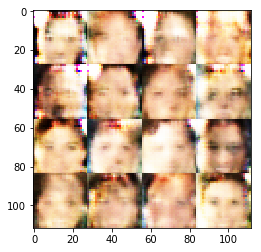

Epoch 1/1... Discriminator Loss: 0.6946... Generator Loss: 1.0912
Epoch 1/1... Discriminator Loss: 1.0551... Generator Loss: 0.8161
Epoch 1/1... Discriminator Loss: 1.3862... Generator Loss: 0.4399
Epoch 1/1... Discriminator Loss: 1.0505... Generator Loss: 0.6275
Epoch 1/1... Discriminator Loss: 0.3993... Generator Loss: 2.3523
Epoch 1/1... Discriminator Loss: 0.9798... Generator Loss: 0.9043
Epoch 1/1... Discriminator Loss: 1.9848... Generator Loss: 0.2278
Epoch 1/1... Discriminator Loss: 0.6414... Generator Loss: 1.3578
Epoch 1/1... Discriminator Loss: 1.7842... Generator Loss: 0.4726
Epoch 1/1... Discriminator Loss: 0.6501... Generator Loss: 1.5125


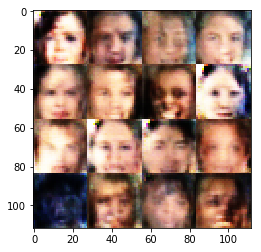

Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 0.5378
Epoch 1/1... Discriminator Loss: 0.1543... Generator Loss: 2.6501
Epoch 1/1... Discriminator Loss: 1.2487... Generator Loss: 0.8158
Epoch 1/1... Discriminator Loss: 1.0895... Generator Loss: 0.6210
Epoch 1/1... Discriminator Loss: 1.3765... Generator Loss: 0.7931
Epoch 1/1... Discriminator Loss: 1.5114... Generator Loss: 0.4734
Epoch 1/1... Discriminator Loss: 0.9108... Generator Loss: 0.8020
Epoch 1/1... Discriminator Loss: 1.4468... Generator Loss: 0.7447
Epoch 1/1... Discriminator Loss: 1.2767... Generator Loss: 0.7963
Epoch 1/1... Discriminator Loss: 1.1802... Generator Loss: 0.5512


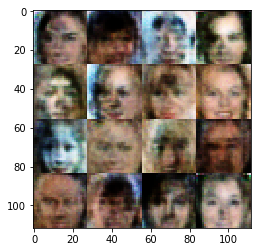

Epoch 1/1... Discriminator Loss: 1.4174... Generator Loss: 0.9524
Epoch 1/1... Discriminator Loss: 1.2276... Generator Loss: 0.6033
Epoch 1/1... Discriminator Loss: 1.5587... Generator Loss: 0.3653
Epoch 1/1... Discriminator Loss: 1.3775... Generator Loss: 0.5576
Epoch 1/1... Discriminator Loss: 1.3523... Generator Loss: 0.4546
Epoch 1/1... Discriminator Loss: 1.0134... Generator Loss: 0.9015
Epoch 1/1... Discriminator Loss: 1.0196... Generator Loss: 1.0427
Epoch 1/1... Discriminator Loss: 1.2249... Generator Loss: 0.7433
Epoch 1/1... Discriminator Loss: 1.5276... Generator Loss: 0.7631
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.6142


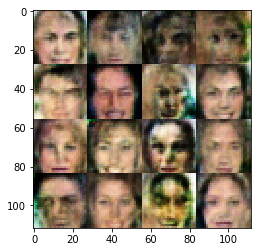

Epoch 1/1... Discriminator Loss: 1.3558... Generator Loss: 0.5754
Epoch 1/1... Discriminator Loss: 1.0107... Generator Loss: 0.6473
Epoch 1/1... Discriminator Loss: 1.6584... Generator Loss: 0.3124
Epoch 1/1... Discriminator Loss: 1.1130... Generator Loss: 0.7622
Epoch 1/1... Discriminator Loss: 1.6271... Generator Loss: 1.1871
Epoch 1/1... Discriminator Loss: 1.3933... Generator Loss: 0.4999


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.25


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.